## Republican States in the US Suffer More from Mass Shooting - True or False?


What is mass shooting?

Although there is no broadly accepted definition for 'mass shooting' in the US, many have tried to define it. 
most definitions are similar, with the main difference being the minimal number of victims (injured or killed). The minimal number of victims vary from 3 to 5 victims for an act of shooting with no cooling-off period.

In 2013, the Congress had defined "Mass killing" as being murder of three or more people.


In this project, "Mass shooting" will refer to an act of firearm violence, in which a gunman injures or kills at least three victims.


The United States has had more mass shootings than any other country.

In fact, one study found that nearly one-third of the world's mass shootings between 1966 and 2012 (90 of 292 incidents) occurred in the United States.

I would like to find out whether "Republican states" in the US suffer more from mass shooting than "Democratic states". 
One question arise immediately when thinking about it - How would you define a "Republican" or a "Democratic state"?

Keep reading to find out.

### Import Data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.set_option('max_columns', 180)
pd.set_option('max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [3]:
# import data

mass_shootings = pd.read_csv('/Users/shiralavi/Desktop/data_analysis/Projects/DBs/us-mass-shootings-last-50-years/mass_shootings_dataset_ver 5.csv', encoding = "ISO-8859-1", parse_dates=["Date"])


In [4]:
mass_shootings.head(3)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force officer, shot and killed 26 people and wounded 20 at a church in Texas. He was found dead later in his vehicle.",26,20,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart in a suburb north of Denver and fatally shot two men and a woman, then left the store and drove away. After an all-night manhunt, Ostrem, who had financial problems but no serious criminal history, was captured by police after being spotted near his apartment in Denver.",3,0,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three people and wounded two others around 9am at Advance Granite Solutions, a home remodeling business where he worked near Baltimore. Hours later he shot and wounded a sixth person at a car dealership in Wilmington, Delaware. He was apprehended that evening following a manhunt by authorities.",3,3,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN


### Data Cleaning

In [5]:
mass_shootings.dtypes

S#                               int64
Title                           object
Location                        object
Date                    datetime64[ns]
Incident Area                   object
Open/Close Location             object
Target                          object
Cause                           object
Summary                         object
Fatalities                       int64
Injured                          int64
Total victims                    int64
Policeman Killed               float64
Age                             object
Employeed (Y/N)                float64
Employed at                     object
Mental Health Issues            object
Race                            object
Gender                          object
Latitude                       float64
Longitude                      float64
dtype: object

In [6]:
mass_shootings.isna().sum()

S#                        0
Title                     0
Location                 45
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues      0
Race                      2
Gender                    0
Latitude                 20
Longitude                20
dtype: int64

In [7]:
# mass_shootings - checking all 45 null in 'Location' column

mass_shootings[mass_shootings['Location'].isna()]['Date']

15   2016-04-26
16   2016-04-24
17   2016-04-21
18   2016-04-19
19   2016-04-19
20   2016-04-19
21   2016-04-18
22   2016-04-09
23   2016-04-09
24   2016-04-07
25   2016-04-01
29   2016-03-25
34   2016-03-15
35   2016-03-13
36   2016-03-12
37   2016-03-11
38   2016-03-11
40   2016-03-09
42   2016-03-07
43   2016-03-07
45   2016-03-06
46   2016-03-05
47   2016-02-28
48   2016-02-28
53   2016-02-25
55   2016-02-21
56   2016-02-21
59   2016-02-20
60   2016-02-20
61   2016-02-19
62   2016-02-09
64   2016-02-07
65   2016-02-06
66   2016-02-06
67   2016-02-06
68   2016-01-31
69   2016-01-30
70   2016-01-29
72   2016-01-25
73   2016-01-23
74   2016-01-23
75   2016-01-17
76   2016-01-11
77   2016-01-07
78   2016-01-06
Name: Date, dtype: datetime64[ns]

In [8]:
# all null 'Location's are attacks from 2016. 
# I will later delete 2016 from this table based on a 'year' column I will create and use a 
# different db to fill the missing information



In [9]:
# importing mass_shooting_usa_XXXX files - shooting incidents from 2016 - 2019

inc_2016 = pd.read_csv('/Users/shiralavi/Desktop/data_analysis/Projects/DBs/mass_shooting/mass_shooting_usa_2016.csv')
inc_2017 = pd.read_csv('/Users/shiralavi/Desktop/data_analysis/Projects/DBs/mass_shooting/mass_shooting_usa_2017.csv')
inc_2018 = pd.read_csv('/Users/shiralavi/Desktop/data_analysis/Projects/DBs/mass_shooting/mass_shooting_usa_2018.csv')
inc_2019 = pd.read_csv('/Users/shiralavi/Desktop/data_analysis/Projects/DBs/mass_shooting/mass_shooting_usa_2019.csv')

frames = [inc_2016, inc_2017, inc_2018, inc_2019]
inc_2016_2019 = pd.concat(frames)



In [10]:
# inc_2016_2019 change column names

inc_2016_2019.columns = ['Date', 'State', 'City', 'Address', 'Fatalities', 'Injured', 'Operations']


In [11]:
# inc_2016_2019 converting date to desired date format

inc_2016_2019['Date'] = pd.to_datetime(inc_2016_2019.Date)

print(inc_2016_2019.shape)
inc_2016_2019.head()

(1119, 7)


,Date,State,City,Address,Fatalities,Injured,Operations
0,2016-12-31,Georgia,Lenox (El Dorado),27 Briarwood Ct,2,2,NaN
1,2016-12-31,Texas,Houston,3704 Fannin Street,1,3,NaN
2,2016-12-30,Ohio,Mansfield,3230 Possum Run Rd,0,5,NaN
3,2016-12-30,Connecticut,Wallingford,95 S Turnpike Rd,2,3,NaN
4,2016-12-28,Georgia,Columbus,2914 10th Street,1,4,NaN


In [12]:
print('Information about the files : ')
print()
print('The db "mass_shootings_dataset_ver 5" contain information about mass shooting incidents \nin the USA in the last 50 years. (Up to 2017)')
print()
print('Number of columns - ', mass_shootings.shape[1])
print('Number of incidents - ', mass_shootings.shape[0])
print()
print('The 4 files "mass_shooting_usa_2016/7/8/9" contain information about mass shooting incidents \nin the USA in the years 2016, 2017, 2018, 2019.')
print()
print('All four files are now combined to one - "inc_2016_2019"')


print('Number of columns - ', inc_2016_2019.shape[1])
print('Number of incidents - ', inc_2016_2019.shape[0])



Information about the files : 

The db "mass_shootings_dataset_ver 5" contain information about mass shooting incidents 
in the USA in the last 50 years. (Up to 2017)

Number of columns -  21
Number of incidents -  323

The 4 files "mass_shooting_usa_2016/7/8/9" contain information about mass shooting incidents 
in the USA in the years 2016, 2017, 2018, 2019.

All four files are now combined to one - "inc_2016_2019"
Number of columns -  7
Number of incidents -  1119


In [13]:
# create 'year' column for both tables

mass_shootings['year'] = mass_shootings['Date'].dt.year
inc_2016_2019['year'] = inc_2016_2019['Date'].dt.year



In [14]:
# mass_shootings table - drop year 2017 and 2016 to avoid duplicates

mass_shootings = mass_shootings[mass_shootings['year'] < 2016]



In [15]:
# check

mass_shootings[mass_shootings['year'] > 2015]

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,year


In [16]:
# mass_shootings table - create 'city' column

mass_shootings['city'] = mass_shootings['Location'].str.rsplit(',', 1).str[0]


In [17]:
# mass_shootings table - create 'state' column

mass_shootings['state'] = mass_shootings['Location'].str.rsplit(',', 1).str[-1]


In [18]:
# mass_shootings table - correcting state column

state_codes = {
    'CA' : 'California',
    'PA': 'Pennsylvania',
    'MD' : 'Maryland',
    'NV' : 'Nevada',
    'WA' : 'Washington',
    'LA' : 'Louisiana',
    'CO' : 'Colorado',
    'TX' : 'Texas',
    'Washington D.C.' : 'Washington'
}


for key, value in state_codes.items():
    mass_shootings['state'] = mass_shootings['state'].str.replace(key, value)



In [19]:
mass_shootings['state'] = mass_shootings['state'].str.replace(' ', '')
mass_shootings['state'].value_counts()


California       29
Florida          15
Texas            15
Washington       14
Georgia          13
NewYork          10
NorthCarolina    10
Arizona          10
Wisconsin         9
Illinois          9
Ohio              9
Alabama           8
Pennsylvania      7
Colorado          6
SouthCarolina     5
Michigan          5
Oklahoma          5
Nevada            5
Tennessee         4
Oregon            4
Minnesota         4
Louisiana         4
Kentucky          4
Virginia          3
NewMexico         3
Mississippi       3
Connecticut       3
NewJersey         3
Massachusetts     3
Nebraska          3
Montana           2
Arkansas          2
Missouri          2
Utah              2
Kansas            1
Idaho             1
Alaska            1
WestVirginia      1
SouthDakota       1
Indiana           1
Iowa              1
Wyoming           1
Hawaii            1
Maine             1
Vermont           1
Name: state, dtype: int64

In [20]:
# match states names in table - inc_2016_2019 to avoid duplicates before combining tables


inc_2016_2019['State'] = inc_2016_2019['State'].str.replace(' ', '')
inc_2016_2019['State'].value_counts()

California            124
Illinois              117
Florida                90
Texas                  75
Pennsylvania           46
Tennessee              45
Louisiana              44
Ohio                   43
NewYork                42
Alabama                38
Georgia                36
Missouri               34
NewJersey              33
Maryland               29
Virginia               29
Michigan               27
NorthCarolina          27
Indiana                25
Mississippi            23
SouthCarolina          18
DistrictofColumbia     17
Arkansas               15
Washington             14
Colorado               14
Kentucky               14
Arizona                13
Minnesota              12
Kansas                 11
Connecticut            10
Nevada                  9
NewMexico               9
Wisconsin               8
Oklahoma                7
Massachusetts           5
Delaware                4
Nebraska                3
Oregon                  2
Iowa                    2
Utah        

In [21]:
# combining the files using sqlite3

db = "usa_mass.db"

def run_query(q):
    with sqlite3.connect(db) as conn:
            return pd.read_sql(q,conn)
            
def run_command(c):
    with sqlite3.connect(db) as conn:
        conn.execute('PRAGMA foreign_keys = ON;')        
        conn.isolation_level = None
        conn.execute(c)
            
def show_tables():
    q = '''
        SELECT 
              name,
              type
        FROM sqlite_master
        WHERE type IN ("table", "view");
        '''
    return run_query(q)

In [22]:
w = '''DROP TABLE IF EXISTS mass_shootings_1966_2019;'''
run_command(w)
x = '''DROP TABLE IF EXISTS mass_shootings_1966_2019_ext;'''
run_command(x)
y = '''DROP TABLE IF EXISTS inc_2016_2019;'''
run_command(y)
z = '''DROP TABLE IF EXISTS mass_shootings;'''
run_command(z)
a = '''DROP TABLE IF EXISTS mass_year_diff;'''
run_command(a)
b = '''DROP TABLE IF EXISTS over_3_elect_party_by_state;'''
run_command(b)
c = '''DROP TABLE IF EXISTS att_2015_2019;'''
run_command(c)
d = '''DROP TABLE IF EXISTS att_state_party_15_19;'''
run_command(d)
e = '''DROP TABLE IF EXISTS att_2015_2019_pk;'''
run_command(e)
f = '''DROP TABLE IF EXISTS over_3_elect_party_by_state_pk;'''
run_command(f)
g = '''DROP TABLE IF EXISTS republicans_per_state;'''
run_command(g)
h = '''DROP TABLE IF EXISTS full_table_2015_2019;'''
run_command(h)
i = '''DROP TABLE IF EXISTS republican_per_att_state;'''
run_command(i)
j = '''DROP TABLE IF EXISTS pop_sate;'''
run_command(j)
k = '''DROP TABLE IF EXISTS republican_per_att_state_pk;'''
run_command(k)
l = '''DROP TABLE IF EXISTS pop_sate_PK;'''
run_command(l)
m = '''DROP TABLE IF EXISTS republicans_per_state_pk;'''
run_command(m)
n = '''DROP TABLE IF EXISTS full_table_2015_2019_pk;'''
run_command(n)



show_tables()

,name,type


In [23]:
tables = {
    'inc_2016_2019' : inc_2016_2019,
    'mass_shootings' : mass_shootings
}

with sqlite3.connect(db) as conn:    
    for name, data in tables.items():
        conn.execute("DROP TABLE IF EXISTS {};".format(name))
        data.to_sql(name,conn,index=False)

/Users/shiralavi/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [24]:
show_tables()


,name,type
0,inc_2016_2019,table
1,mass_shootings,table


In [25]:
# combining the tables - create new table mass_shootings_1966_2019

c1 = '''
CREATE TABLE IF NOT EXISTS mass_shootings_1966_2019 (
    year INTEGER,
    date TEXT,
    state TEXT,
    city TEXT,
    location TEXT,
    Fatalities INTEGER,
    injured INTEGER,
    total_victims INTEGER
    );
'''

run_command(c1)

In [26]:
c2 = '''
INSERT OR REPLACE INTO mass_shootings_1966_2019
    SELECT
        year, 
        Date, 
        state, 
        city, 
        Location, 
        Fatalities, 
        Injured, 
        Fatalities + Injured AS total_victims
    FROM mass_shootings
    
    UNION
    
    SELECT 
        year, 
        Date, 
        State, 
        City, 
        Address, 
        Fatalities, 
        Injured, 
        Fatalities + Injured AS total_victims
    FROM inc_2016_2019
    ;

'''

run_command(c2)

In [27]:
q1 = '''SELECT * FROM mass_shootings_1966_2019 LIMIT 20;'''

run_query(q1)

,year,date,state,city,location,Fatalities,injured,total_victims
0,1966,1966-08-01 00:00:00,Texas,Austin,"Austin, Texas",17,32,49
1,1966,1966-11-12 00:00:00,Arizona,Mesa,"Mesa, Arizona",5,1,6
2,1971,1971-11-11 00:00:00,Washington,Spokane,"Spokane, Washington",2,4,6
3,1972,1972-12-31 00:00:00,Louisiana,New Orleans,"New Orleans, Louisiana",10,13,23
4,1974,1974-01-17 00:00:00,Illinois,Chicago,"Chicago, Illinois",1,3,4
5,1974,1974-12-30 00:00:00,NewYork,Olean,"Olean, New York",3,7,10
6,1976,1976-02-19 00:00:00,California,Los Angeles,"Los Angeles, California",1,7,8
7,1976,1976-07-12 00:00:00,California,Fullerton,"Fullerton, California",7,2,9
8,1979,1979-01-29 00:00:00,California,San Diego,"San Diego, California",2,9,11
9,1979,1979-10-06 00:00:00,SouthCarolina,Columbia,"Columbia, South Carolina",2,5,7


In [28]:
# convert table into pandas DataFrame

conn = sqlite3.connect('usa_mass.db')
mass_shootings_1966_2019 = pd.read_sql_query('SELECT * FROM mass_shootings_1966_2019',conn)

In [29]:
mass_shootings_1966_2019.head()

,year,date,state,city,location,Fatalities,injured,total_victims
0,1966,1966-08-01 00:00:00,Texas,Austin,"Austin, Texas",17,32,49
1,1966,1966-11-12 00:00:00,Arizona,Mesa,"Mesa, Arizona",5,1,6
2,1971,1971-11-11 00:00:00,Washington,Spokane,"Spokane, Washington",2,4,6
3,1972,1972-12-31 00:00:00,Louisiana,New Orleans,"New Orleans, Louisiana",10,13,23
4,1974,1974-01-17 00:00:00,Illinois,Chicago,"Chicago, Illinois",1,3,4


In [30]:
# create 'month' column

mass_shootings_1966_2019['date'] = pd.to_datetime(mass_shootings_1966_2019.date)
mass_shootings_1966_2019['month'] = mass_shootings_1966_2019['date'].dt.month

In [31]:
months = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'September',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}

for key, value in months.items():
    mass_shootings_1966_2019['month'] = mass_shootings_1966_2019['month'].replace(key, value)


In [32]:
mass_shootings_1966_2019['month'].value_counts()

July         146
June         145
August       131
February     119
April        118
October      110
September    109
January      108
November     102
May           98
December      93
March         84
Name: month, dtype: int64

### Visualization

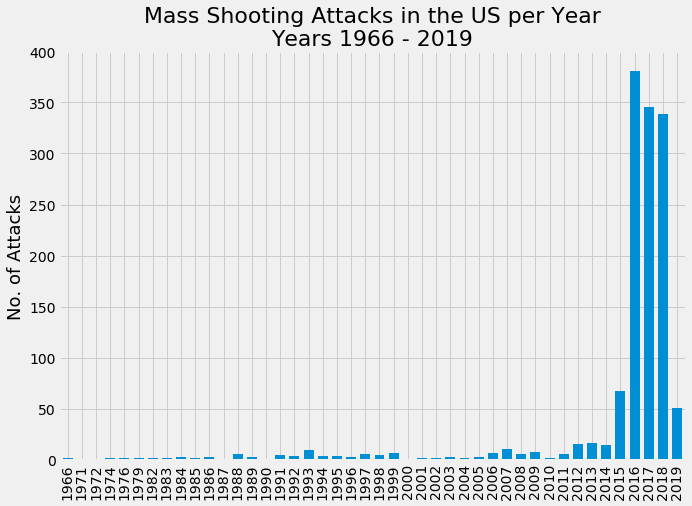

In [33]:
# Plot number of shooting attacks per year

att_per_year = mass_shootings_1966_2019[['location', 'year']].groupby('year').count()


plt.style.use('fivethirtyeight')

att_per_year.plot.bar(align = 'center', width = 0.7, figsize=(10,7))
plt.title('Mass Shooting Attacks in the US per Year\nYears 1966 - 2019', fontsize = 22)
plt.ylim(0,400)
plt.ylabel('No. of Attacks', fontsize=18)
plt.xlabel('')
plt.legend().set_visible(False)

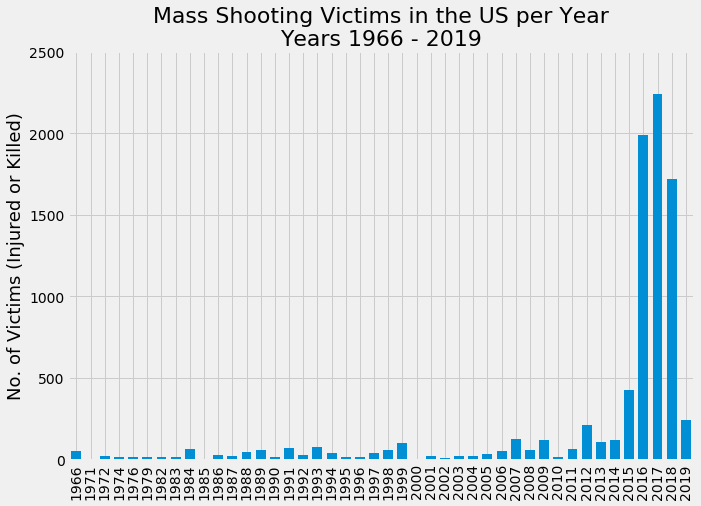

In [34]:
# Plot number of victims per year

victims_per_year = mass_shootings_1966_2019[['total_victims', 'year']].groupby('year').sum()

victims_per_year.plot.bar(align = 'center', width = 0.7, figsize=(10,7))
plt.title('Mass Shooting Victims in the US per Year\nYears 1966 - 2019', fontsize = 22)
plt.ylim(0,2500)
plt.ylabel('No. of Victims (Injured or Killed)', fontsize=18)
plt.xlabel('')
plt.legend().set_visible(False)

#### Observation

From the two charts above, it is clear that 2015 was a turning point where number of attacks and number of victims has drastically Increased. After that, in 2016, there was an even more drastic increase in number of attacks and victims.

I would like to focus on mass shooting incidents from 2015 and later, to find out if there is a linkage between the number of mass shooting incidents and a states' political tendency.


### Presidential Elections by State

In [35]:
# import data

elections_by_state = pd.read_csv('/Users/shiralavi/Desktop/data_analysis/Projects/DBs/blue_and_red_states.csv',)
elections_by_state.columns = ['state', '1972', '1976', '1980', '1984', '1988', '1992', '1996',
       '2000', '2004', '2008', '2012', '2016']
elections_by_state.head()

,state,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
0,Alabama,Nixon,Carter,Reagan,Reagan,Bush,Bush,Dole,Bush,Bush,McCain,Romney,Trump
1,Alaska,Nixon,Ford,Reagan,Reagan,Bush,Bush,Dole,Bush,Bush,McCain,Romney,Trump
2,Arizona,Nixon,Ford,Reagan,Reagan,Bush,Bush,Clinton,Bush,Bush,McCain,Romney,Trump
3,Arkansas,Nixon,Carter,Reagan,Reagan,Bush,Clinton,Clinton,Bush,Bush,McCain,Romney,Trump
4,California,Nixon,Ford,Reagan,Reagan,Bush,Clinton,Clinton,Gore,Kerry,Obama,Obama,H. Clinton


In [36]:
party_by_state = elections_by_state.copy()

can_party = {
    'Nixon' : 'Republican',
    'McGovern' : 'Democratic',
    'Ford' : 'Republican',
    'Carter' : 'Democratic',
    'Reagan' : 'Republican',
    'Anderson' : 'Independent',
    'Mondale' : 'Democratic',
    'Dukakis' : 'Democratic',
    'Bush' : 'Republican',
    'Clinton' : 'Democratic',
    'Perot' : 'Reform',
    'Dole' : 'Republican',
    'Gore' : 'Democratic',
    'Kerry' : 'Democratic',
    'Obama' : 'Democratic',
    'McCain' : 'Republican',
    'Romney' :'Republican',
    'Trump' : 'Republican',
    'H. Clinton' : 'Democratic' 
}

party_by_state.replace(can_party, inplace=True)

party_by_state.head()

,state,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
0,Alabama,Republican,Democratic,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican
1,Alaska,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican
2,Arizona,Republican,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,Republican,Republican,Republican
3,Arkansas,Republican,Democratic,Republican,Republican,Republican,Democratic,Democratic,Republican,Republican,Republican,Republican,Republican
4,California,Republican,Republican,Republican,Republican,Republican,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic


Cross mass shooting data from 2015 - 2019 with the results of the last 3 presidential elections (2008 - 2016).
<br>The reason for including the 2008 elections is to present a stronger base of each state's political tendency.


##### General view over the last decade - Taking under consideration the last three elections results : 2008, 2012, 2016
- A state would be defined as 'Democratic' or 'Republican' only if they have elected that party continuously over the last three elections.
- In case there are inconsistencies (for example, one state elected Republican party twice and Democratic party once) I would mark this state as 'Neutral'.


## Hypothesis - 
#### States that have continuously elected the 'Republican' party over the last decade experienced more mass shooting attacks in the last 4 years than states that have continuously elected the 'Democratic' party. 




In [37]:
party_by_state_01 = party_by_state.copy()

par_01 = {
    'Democratic' : 1,
    'Republican' :0
}

party_by_state_01.replace(par_01, inplace=True)
party_by_state_01.head()

,state,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
0,Alabama,0,1,0,0,0,0,0,0,0,0,0,0
1,Alaska,0,0,0,0,0,0,0,0,0,0,0,0
2,Arizona,0,0,0,0,0,0,1,0,0,0,0,0
3,Arkansas,0,1,0,0,0,1,1,0,0,0,0,0
4,California,0,0,0,0,0,1,1,1,1,1,1,1


In [38]:
over_3_elect_party_by_state = party_by_state_01[['state', '2008', '2012', '2016']].copy()

over_3_elect_party_by_state['total'] =over_3_elect_party_by_state['2008'] + over_3_elect_party_by_state['2012'] + over_3_elect_party_by_state['2016']
over_3_elect_party_by_state.head()

,state,2008,2012,2016,total
0,Alabama,0,0,0,0
1,Alaska,0,0,0,0
2,Arizona,0,0,0,0
3,Arkansas,0,0,0,0
4,California,1,1,1,3


In [39]:
def party(row):
    if row['total'] == 3:
        return 'Democratic'
    elif row['total'] == 0:
        return 'Republican'
    else:
        return 'Neutral'
    

over_3_elect_party_by_state['party'] = over_3_elect_party_by_state.apply(party, axis=1)


In [40]:
over_3_elect_party_by_state.head()

,state,2008,2012,2016,total,party
0,Alabama,0,0,0,0,Republican
1,Alaska,0,0,0,0,Republican
2,Arizona,0,0,0,0,Republican
3,Arkansas,0,0,0,0,Republican
4,California,1,1,1,3,Democratic


### 2015 - 2019 Mass Shooting Attacks per State

In [41]:
# create new dataframe with information about attacks in 2015-2019 per state

att_2015_2019 = mass_shootings_1966_2019[['state', 'Fatalities', 'injured', 'total_victims']][mass_shootings_1966_2019['year'] >= 2015]
att_2015_2019['attack'] = 1

att_2015_2019 = att_2015_2019.groupby('state').sum()
att_2015_2019['state'] = att_2015_2019.index
att_2015_2019 = att_2015_2019.reset_index(drop=True)

att_2015_2019

,Fatalities,injured,total_victims,attack,state
0,40,156,196,40,Alabama
1,35,51,86,17,Arizona
2,14,74,88,15,Arkansas
3,162,537,699,126,California
4,26,54,80,16,Colorado
5,4,48,52,10,Connecticut
6,6,12,18,4,Delaware
7,6,72,78,17,DistrictofColumbia
8,171,455,626,96,Florida
9,62,153,215,44,Georgia


In [42]:
# Add missing states (with no mass shooting attacks in the last 4 years) to the dataframe

att_2015_2019.loc[44] = [0, 0, 0, 0,'Alaska']
att_2015_2019.loc[45] = [0, 0, 0, 0,'Hawaii']
att_2015_2019.loc[46] = [0, 0, 0, 0,'NewHampshire']
att_2015_2019.loc[47] = [0, 0, 0, 0,'NorthDakota']
att_2015_2019.loc[48] = [0, 0, 0, 0,'RhodeIsland']
att_2015_2019.loc[49] = [0, 0, 0, 0,'Vermont']
att_2015_2019.loc[50] = [0, 0, 0, 0,'Wyoming']

In [43]:
att_2015_2019 = att_2015_2019.sort_values('state', ascending=True)
att_2015_2019 = att_2015_2019.reset_index(drop=True)

att_2015_2019

,Fatalities,injured,total_victims,attack,state
0,40,156,196,40,Alabama
1,0,0,0,0,Alaska
2,35,51,86,17,Arizona
3,14,74,88,15,Arkansas
4,162,537,699,126,California
5,26,54,80,16,Colorado
6,4,48,52,10,Connecticut
7,6,12,18,4,Delaware
8,6,72,78,17,DistrictofColumbia
9,171,455,626,96,Florida


In [44]:
# convert dataframe to sqlite to combine tables

tables['over_3_elect_party_by_state'] = over_3_elect_party_by_state
tables['att_2015_2019'] = att_2015_2019

with sqlite3.connect(db) as conn:    
    for name, data in tables.items():
        conn.execute("DROP TABLE IF EXISTS {};".format(name))
        data.to_sql(name,conn,index=False)



/Users/shiralavi/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [45]:
show_tables()

,name,type
0,mass_shootings_1966_2019,table
1,inc_2016_2019,table
2,mass_shootings,table
3,over_3_elect_party_by_state,table
4,att_2015_2019,table


In [46]:
# recreating the tables to set state as primary key


c12 = '''CREATE TABLE att_2015_2019_pk(
            state TEXT PRIMARY KEY,
            attacks INTEGER,
            Fatalities INTEGER,
            injured INTEGER,
            total_victims INTEGER
            );
'''

c13 = '''CREATE TABLE over_3_elect_party_by_state_pk(
            state TEXT PRIMARY KEY,
            party TEXT
            );
'''


c14 = '''
    INSERT OR REPLACE INTO att_2015_2019_pk
    SELECT
        state as state, 
        attack as attacks, 
        Fatalities as Fatalities, 
        injured as injured, 
        total_victims as total_victims
    FROM att_2015_2019;
    '''


c15 = '''
    INSERT OR REPLACE INTO over_3_elect_party_by_state_pk
    SELECT
        state, 
        party
        FROM over_3_elect_party_by_state;
    '''


c16 = '''DROP TABLE IF EXISTS att_2015_2019;'''
c17 = '''DROP TABLE IF EXISTS over_3_elect_party_by_state;'''



run_command(c12)
run_command(c13)
run_command(c14)
run_command(c15)
run_command(c16)
run_command(c17)

In [47]:
q14 = '''SELECT * FROM over_3_elect_party_by_state_pk LIMIT 10;'''

run_query(q14)

,state,party
0,Alabama,Republican
1,Alaska,Republican
2,Arizona,Republican
3,Arkansas,Republican
4,California,Democratic
5,Colorado,Democratic
6,Connecticut,Democratic
7,Delaware,Democratic
8,DistrictofColumbia,Democratic
9,Florida,Neutral


In [48]:
q15 = '''SELECT * FROM att_2015_2019_pk LIMIT 10;'''

run_query(q15)

,state,attacks,Fatalities,injured,total_victims
0,Alabama,40,40,156,196
1,Alaska,0,0,0,0
2,Arizona,17,35,51,86
3,Arkansas,15,14,74,88
4,California,126,162,537,699
5,Colorado,16,26,54,80
6,Connecticut,10,4,48,52
7,Delaware,4,6,12,18
8,DistrictofColumbia,17,6,72,78
9,Florida,96,171,455,626


In [49]:
# combining the tables and convert into pandas dataframe


q16 = '''
        SELECT 
            a22.state, 
            o3e.party, 
            a22.attacks, 
            a22.Fatalities, 
            a22.injured, 
            a22.total_victims
        FROM att_2015_2019_pk a22
        LEFT JOIN over_3_elect_party_by_state_pk o3e ON o3e.state = a22.state;
'''

full_table_2015_2019 = run_query(q16)


In [50]:
full_table_2015_2019

,state,party,attacks,Fatalities,injured,total_victims
0,Alabama,Republican,40,40,156,196
1,Alaska,Republican,0,0,0,0
2,Arizona,Republican,17,35,51,86
3,Arkansas,Republican,15,14,74,88
4,California,Democratic,126,162,537,699
5,Colorado,Democratic,16,26,54,80
6,Connecticut,Democratic,10,4,48,52
7,Delaware,Democratic,4,6,12,18
8,DistrictofColumbia,Democratic,17,6,72,78
9,Florida,Neutral,96,171,455,626


In [51]:
# create 'Republican', 'Democratic' and 'Neutral' tables

republican_states = full_table_2015_2019[full_table_2015_2019['party'] == 'Republican']
democratic_states = full_table_2015_2019[full_table_2015_2019['party'] == 'Democratic']
neutral_states = full_table_2015_2019[full_table_2015_2019['party'] == 'Neutral']


### Measure STD for No. of Attacks in each Political Sector

In [52]:
d = {'Political Sector' : ['Republican', 'Democratic', 'Neutral'], 'Average no. of Attacks per State': [np.mean(republican_states['attacks']), np.mean(democratic_states['attacks']), np.mean(neutral_states['attacks'])], 'STD of Number of Attacks per State': [np.std(republican_states['attacks']), np.std(democratic_states['attacks']), np.std(neutral_states['attacks'])]}

mean_std_attacks = pd.DataFrame(data=d)
mean_std_attacks

,Political Sector,Average no. of Attacks per State,STD of Number of Attacks per State
0,Republican,18.681818,20.802942
1,Democratic,23.238095,34.490723
2,Neutral,35.875000,26.923213


In [53]:
mean_std_attacks = mean_std_attacks.set_index('Political Sector')


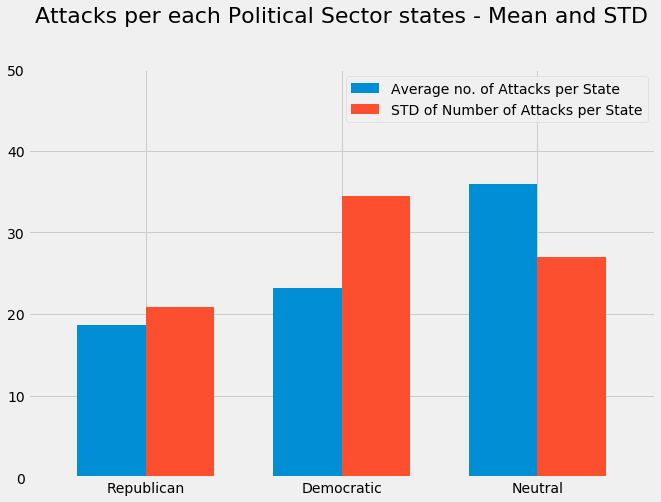

In [54]:
plt.style.use('fivethirtyeight')

mean_std_attacks.plot.bar(align = 'center', width = 0.7, figsize=(10,7))
plt.title('Attacks per each Political Sector states - Mean and STD', fontsize = 22, Y= 1.1)
plt.ylim(0,50)
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation='horizontal')
plt.legend()


In [55]:
print(democratic_states.shape[0])
democratic_states[democratic_states['attacks'] == 0]

21


,state,party,attacks,Fatalities,injured,total_victims
11,Hawaii,Democratic,0,0,0,0
29,NewHampshire,Democratic,0,0,0,0
39,RhodeIsland,Democratic,0,0,0,0
45,Vermont,Democratic,0,0,0,0


As we can see, Republican states have the lowest mean number of attacks per state (18.6 attacks per state) and lowest STD (20.8). <br>
Having the lowest STD means that the values (Number of attacks per states) are all relatively clustered around the mean.<br><br> 
Democratic states have a higher number of attacks per state in average, but also have a higher STD.<br> 
Having higher STD, tells us that the range of number of attacks per state in Democratic states is higher, there are Democratic states with very high number of attacks (like California), and Democratic states with non (like Hawaii, New Hampshire, Rhode Island, Vermont). <br>

The high STD in Democratic states lets us know that the high mean number of attacks in those states don't necessarily have something to do with them being Democratic. 
<br><br>

#### I would like to look farther to find if there is a connection between the percentage of republican voters in a state and number of mass shooting attacks.
<br>
In order to do so I would use an additional table - 'rep_percentage2008_2016_elections'.<br>
This table contains information about the last 3 presidential elections (2008, 2012, 2016) - Total number of voters per state, and number of people who have voted for the Republican party.  
<br>

<br>

The data in this table was collected independently using various sources.

In [56]:
# import data

republicans_per_state = pd.read_csv('/Users/shiralavi/Desktop/data_analysis/Projects/DBs/rep_percentage2008_2016_elections.csv')

republicans_per_state.head()

,state,Republican Votes 2008,Total Number of Voters 2008,Republican Votes 2012,Total Number of Voters 2012,Republican Votes 2016,Total Number of Voters 2016,Total Number of Voters,Republican Votes,Republican Percentage 2008-2016
0,Alabama,"1,266,546","2,099,819","1,255,925","2,074,338","1,318,255","2,123,372","6,297,529","3,840,726",0.609878
1,Alaska,"193,841","326,197","164,676","300,495","163,387","318,608","945,300","521,904",0.552104
2,Arizona,"1,230,111","2,293,475","1,233,654","2,299,254","1,252,401","2,573,165","7,165,894","3,716,166",0.518591
3,Arkansas,"638,017","1,086,617","647,744","1,069,468","684,872","1,130,635","3,286,720","1,970,633",0.599574
4,California,"5,011,781","13,561,900","4,839,958","13,038,547","4,483,810","14,181,595","40,782,042","14,335,549",0.351516


In [57]:
republicans_per_state.columns = ['state', 'Republican Votes 2008', 'Total Number of Voters 2008',
       'Republican Votes 2012', 'Total Number of Voters 2012',
       'Republican Votes 2016', 'Total Number of Voters 2016',
       'Total_Number_of_Voters', 'Republican_Votes',
       'Republican_Percentage_2008_2016']

In [58]:
republicans_per_state[['state', 'Republican_Percentage_2008_2016']]

,state,Republican_Percentage_2008_2016
0,Alabama,0.609878
1,Alaska,0.552104
2,Arizona,0.518591
3,Arkansas,0.599574
4,California,0.351516
5,Colorado,0.446556
6,Connecticut,0.399436
7,Delaware,0.396005
8,DistrictofColumbia,0.059102
9,Florida,0.487996


In [59]:
# convert dataframe to sqlite to combine tables

tables['republicans_per_state'] = republicans_per_state
tables['full_table_2015_2019'] = full_table_2015_2019

with sqlite3.connect(db) as conn:    
    for name, data in tables.items():
        conn.execute("DROP TABLE IF EXISTS {};".format(name))
        data.to_sql(name,conn,index=False)



/Users/shiralavi/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


In [60]:
q17 = '''SELECT * FROM republicans_per_state LIMIT 10;'''

run_query(q17)

,state,Republican Votes 2008,Total Number of Voters 2008,Republican Votes 2012,Total Number of Voters 2012,Republican Votes 2016,Total Number of Voters 2016,Total_Number_of_Voters,Republican_Votes,Republican_Percentage_2008_2016
0,Alabama,"1,266,546","2,099,819","1,255,925","2,074,338","1,318,255","2,123,372","6,297,529","3,840,726",0.609878
1,Alaska,"193,841","326,197","164,676","300,495","163,387","318,608","945,300","521,904",0.552104
2,Arizona,"1,230,111","2,293,475","1,233,654","2,299,254","1,252,401","2,573,165","7,165,894","3,716,166",0.518591
3,Arkansas,"638,017","1,086,617","647,744","1,069,468","684,872","1,130,635","3,286,720","1,970,633",0.599574
4,California,"5,011,781","13,561,900","4,839,958","13,038,547","4,483,810","14,181,595","40,782,042","14,335,549",0.351516
5,Colorado,"1,073,629","2,401,462","1,185,243","2,569,518","1,202,484","2,780,247","7,751,227","3,461,356",0.446556
6,Connecticut,"629,428","1,646,797","634,892","1,558,960","673,215","1,644,920","4,850,677","1,937,535",0.399436
7,Delaware,"152,374","412,412","165,484","413,921","185,127","443,814","1,270,147","502,985",0.396005
8,DistrictofColumbia,"17,367","265,853","21,381","293,764","12,723","311,268","870,885","51,471",0.059102
9,Florida,"4,045,624","8,390,744","4,163,447","8,474,179","4,617,886","9,420,039","26,284,962","12,826,957",0.487996


In [61]:
c23 = '''DROP TABLE IF EXISTS republicans_per_state_pk;'''
c24 = '''DROP TABLE IF EXISTS full_table_2015_2019_pk;'''

run_command(c23)
run_command(c24)

In [62]:
# recreating the tables to set state as primary key


c17 = '''CREATE TABLE republicans_per_state_pk(
            state TEXT PRIMARY KEY,
            republican_percentage REAL
            );
'''

c18 = '''CREATE TABLE full_table_2015_2019_pk(
            state TEXT PRIMARY KEY,
            party TEXT,
            attacks INTEGER,
            fatalities INTEGER,
            injured INTEGER,
            total_victims INTEGER
            );
'''


c19 = '''
    INSERT OR REPLACE INTO republicans_per_state_pk
    SELECT
        state, 
        Republican_Percentage_2008_2016
    FROM republicans_per_state;
    '''


c20 = '''
    INSERT OR REPLACE INTO full_table_2015_2019_pk
    SELECT
        state, 
        party,
        attacks,
        Fatalities,
        injured,
        total_victims
        FROM full_table_2015_2019;
    '''


c21 = '''DROP TABLE IF EXISTS republicans_per_state;'''
c22 = '''DROP TABLE IF EXISTS full_table_2015_2019;'''



run_command(c17)
run_command(c18)
run_command(c19)
run_command(c20)
run_command(c21)
run_command(c22)

In [63]:
# combining the tables and convert into pandas dataframe


q18 = '''
        SELECT 
            ft.state, 
            ft.party,
            rps.republican_percentage,
            ft.attacks, 
            ft.fatalities, 
            ft.injured, 
            ft.total_victims
        FROM full_table_2015_2019_pk ft
        LEFT JOIN republicans_per_state_pk rps ON ft.state = rps.state;
'''

republican_per_att_state = run_query(q18)


republican_per_att_state.head()


,state,party,republican_percentage,attacks,fatalities,injured,total_victims
0,Alabama,Republican,0.609878,40,40,156,196
1,Alaska,Republican,0.552104,0,0,0,0
2,Arizona,Republican,0.518591,17,35,51,86
3,Arkansas,Republican,0.599574,15,14,74,88
4,California,Democratic,0.351516,126,162,537,699


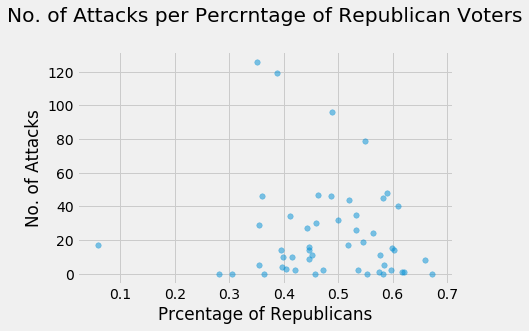

In [64]:
# plot number of attacks per percrntage of republican voters

republican_per_att_state

x = republican_per_att_state['republican_percentage']
y = republican_per_att_state['attacks']

plt.scatter(x, y, alpha=0.5, s=30)
plt.title('No. of Attacks per Percrntage of Republican Voters', y=1.1)
plt.ylabel('No. of Attacks')
plt.xlabel('Prcentage of Republicans')
plt.show()

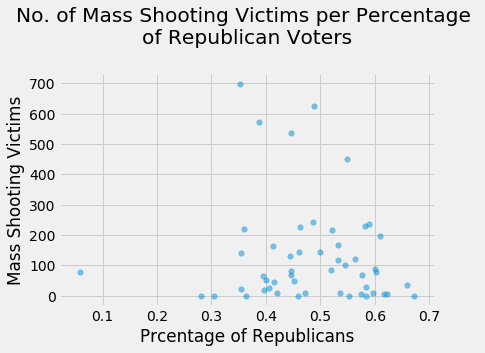

In [65]:
# plot number of victims per percentage of republican voters
republican_per_att_state

x = republican_per_att_state['republican_percentage']
y = republican_per_att_state['total_victims']

plt.scatter(x, y, alpha=0.5, s=30)
plt.title('No. of Mass Shooting Victims per Percentage \nof Republican Voters', y=1.1)
plt.ylabel('Mass Shooting Victims')
plt.xlabel('Prcentage of Republicans')
plt.show()

In [66]:
republican_per_att_state[republican_per_att_state['republican_percentage'] <= 0.3]

,state,party,republican_percentage,attacks,fatalities,injured,total_victims
8,DistrictofColumbia,Democratic,0.059102,17,6,72,78
11,Hawaii,Democratic,0.281223,0,0,0,0


The majority of US states have experienced less than 50 mass shooting attacks since 2015, there is not a significant difference in number of attacks between states with high rate of republican voters and states with low rate of republican voters.  <br> 



### Relativity - Chang 'Number of attacks' to 'Attacks per 100K Residents' 

In [67]:
# upload a file with population per state

pop_sate = pd.read_csv('/Users/shiralavi/Desktop/data_analysis/Projects/DBs/us_state_population.csv')
pop_sate.head()



,State,Population_estimate_2018,Percent_of_total_US_population
0,Alabama,"4,887,871",1.48%
1,Alaska,"737,438",0.22%
2,Arizona,"7,171,646",2.17%
3,Arkansas,"3,013,825",0.91%
4,California,"39,559,045",11.96%


In [68]:
pop_sate['Population_estimate_2018'].replace(regex=True,inplace=True,to_replace=r',',value=r'')
pop_sate['Population_estimate_2018'] = pop_sate['Population_estimate_2018'].astype(int)

In [69]:
pop_sate.dtypes

State                             object
Population_estimate_2018           int64
Percent_of_total_US_population    object
dtype: object

In [70]:
# convert dataframe to sqlite to combine tables

tables['republican_per_att_state'] = republican_per_att_state
tables['pop_sate'] = pop_sate

with sqlite3.connect(db) as conn:    
    for name, data in tables.items():
        conn.execute("DROP TABLE IF EXISTS {};".format(name))
        data.to_sql(name,conn,index=False)



In [71]:
q19 = '''SELECT * FROM republican_per_att_state LIMIT 10;'''

run_query(q19)
q20 = '''SELECT * FROM pop_sate LIMIT 10;'''

run_query(q20)


,State,Population_estimate_2018,Percent_of_total_US_population
0,Alabama,4887871,1.48%
1,Alaska,737438,0.22%
2,Arizona,7171646,2.17%
3,Arkansas,3013825,0.91%
4,California,39559045,11.96%
5,Colorado,5695564,1.72%
6,Connecticut,3572665,1.08%
7,Delaware,967171,0.29%
8,DistrictofColumbia,702455,0.21%
9,Florida,21299325,6.44%


In [72]:
# recreating the tables to set state as primary key


c23 = '''CREATE TABLE republican_per_att_state_pk(
            state TEXT PRIMARY KEY,
            party TEXT,
            republican_percentage REAL,
            attacks INTEGER,
            fatalities INTEGER,
            injured INTEGER,
            total_victims INTEGER
            );
'''


c24 = '''CREATE TABLE pop_sate_PK(
            state TEXT PRIMARY KEY,
            population INTEGER
            );
'''


c25 = '''
    INSERT OR REPLACE INTO republican_per_att_state_pk
    SELECT
        state,
        party,
        republican_percentage,
        attacks,
        fatalities,
        injured,
        total_victims
    FROM republican_per_att_state;
    '''


c26 = '''
    INSERT OR REPLACE INTO pop_sate_PK
    SELECT
        state, 
        Population_estimate_2018 AS population
    FROM pop_sate;
    '''


c27 = '''DROP TABLE IF EXISTS pop_sate;'''
c28 = '''DROP TABLE IF EXISTS republican_per_att_state;'''



run_command(c23)
run_command(c24)
run_command(c25)
run_command(c26)
run_command(c27)
run_command(c28)

In [73]:
# combine the tables and convert into pandas dataframe


q21 = '''
        SELECT
            rpa.state,
            ps.population,
            rpa.party,
            rpa.republican_percentage,
            rpa.attacks,
            rpa.fatalities,
            rpa.injured,
            rpa.total_victims
        FROM republican_per_att_state_pk rpa
        LEFT JOIN pop_sate_PK ps ON ps.state = rpa.state;
'''

republican_per_att_state_pop = run_query(q21)


republican_per_att_state_pop.head()



,state,population,party,republican_percentage,attacks,fatalities,injured,total_victims
0,Alabama,4887871,Republican,0.609878,40,40,156,196
1,Alaska,737438,Republican,0.552104,0,0,0,0
2,Arizona,7171646,Republican,0.518591,17,35,51,86
3,Arkansas,3013825,Republican,0.599574,15,14,74,88
4,California,39559045,Democratic,0.351516,126,162,537,699


In [74]:
republican_per_att_state_pop['attack_per_pop'] = (republican_per_att_state_pop['attacks'] / republican_per_att_state_pop['population'])*100000

In [75]:
republican_per_att_state_pop.head()

,state,population,party,republican_percentage,attacks,fatalities,injured,total_victims,attack_per_pop
0,Alabama,4887871,Republican,0.609878,40,40,156,196,0.818352
1,Alaska,737438,Republican,0.552104,0,0,0,0,0.000000
2,Arizona,7171646,Republican,0.518591,17,35,51,86,0.237045
3,Arkansas,3013825,Republican,0.599574,15,14,74,88,0.497706
4,California,39559045,Democratic,0.351516,126,162,537,699,0.318511


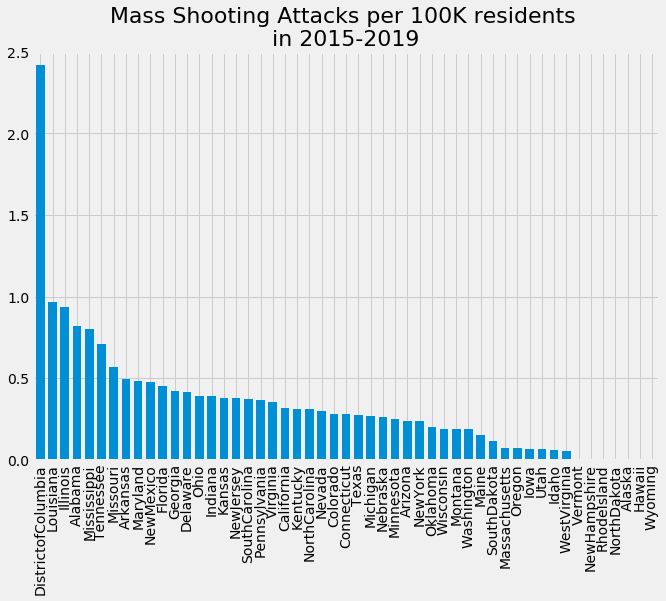

In [76]:
# Plot number of attacks per 100k residents for each state

att_per_100k = republican_per_att_state_pop[['state', 'attack_per_pop']]
att_per_100k = att_per_100k.set_index('state')
att_per_100k = att_per_100k.sort_values('attack_per_pop', ascending=False)

plt.style.use('fivethirtyeight')

att_per_100k.plot.bar(align = 'center', width = 0.7, figsize=(10,7))
plt.title('Mass Shooting Attacks per 100K residents \nin 2015-2019', fontsize = 22)
plt.ylim(0,2.5)
plt.ylabel('', fontsize=18)
plt.xlabel('')
plt.legend().set_visible(False)

/Users/shiralavi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


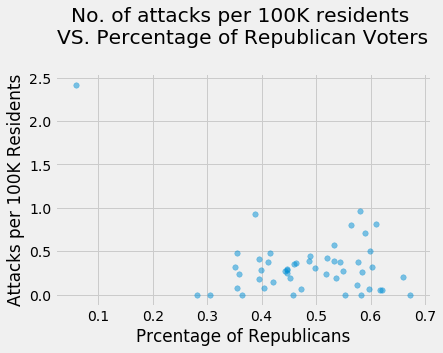

In [78]:
# Plot number of attacks per 100k vs percentage of republican voters

att_per_100k_rep = republican_per_att_state_pop[['state', 'attack_per_pop', 'republican_percentage']]
att_per_100k_rep['attack_per_pop'] = att_per_100k_rep['attack_per_pop']
att_per_100k_rep = att_per_100k_rep.set_index('state')
att_per_100k_rep = att_per_100k_rep.sort_values('republican_percentage', ascending=False)


y = att_per_100k_rep['attack_per_pop']
x = att_per_100k_rep['republican_percentage']

plt.scatter(x, y, alpha=0.5, s=30)
plt.title('No. of attacks per 100K residents \nVS. Percentage of Republican Voters', y=1.1)
plt.xlabel('Prcentage of Republicans')
plt.ylabel('Attacks per 100K Residents')
plt.show()

### Correlation Coefficient

Correlation coefficients are used to assess the strength and direction of the linear relationships between pairs of variables.

In [79]:

republican_per_att_state_pop.corr(method='pearson', min_periods=1)

,population,republican_percentage,attacks,fatalities,injured,total_victims,attack_per_pop
population,1.000000,-0.131966,0.858488,0.859472,0.751558,0.795957,0.052873
republican_percentage,-0.131966,1.000000,-0.103389,-0.017577,-0.122838,-0.100714,-0.342717
attacks,0.858488,-0.103389,1.000000,0.883168,0.882047,0.904146,0.342117
fatalities,0.859472,-0.017577,0.883168,1.000000,0.866602,0.919940,0.203711
injured,0.751558,-0.122838,0.882047,0.866602,1.000000,0.992859,0.298586
total_victims,0.795957,-0.100714,0.904146,0.919940,0.992859,1.000000,0.283295
attack_per_pop,0.052873,-0.342717,0.342117,0.203711,0.298586,0.283295,1.000000


#### The correlation between 'republican_percentage' and 'attack_per_pop' (attacks per 100K residents) is -0.342717.

## Weak negative relationship.

Having a correlation weaker than 0.5 or -0.5 indicates that the two variables are not necessarily correlated.

This project shows that 'Republican states' do not suffer more from mass shooting incidents. <br>
My guess is that there is a stronger connection between 'Weak gun laws' and mass shooting and also 'High gun ownership' and mass shooting.

